In [8]:
import torch
import numpy as np
src_X = torch.load("/dataset/zhuotaotian/bhpeng/SLM-weight/vectordb/output/model_6*40_all.pth", map_location=torch.device('cpu'))

In [40]:
X = []
classes = []
groups = []
for i in range(5):
    for j in range(4):
        for k in range(6):
            X.append(src_X['keys'][0, k, i*8+j])
            classes.append(i)
            groups.append(k)
X = torch.stack(X, dim=0).numpy()
X = ((X-X.min()) / (X.max() - X.min()) - 0.5) * 2
classes = np.array(classes)
groups = np.array(groups)

/tmp/ipykernel_844249/1972629522.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  class_colors = plt.cm.get_cmap("Set1", len(np.unique(classes)))


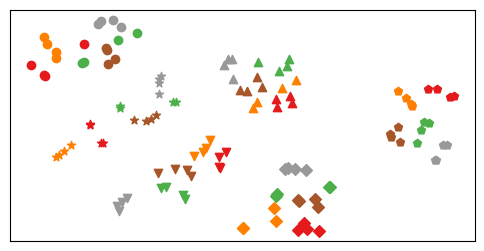

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold,datasets
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(X)
embedded_vectors = ((embedded_vectors-embedded_vectors.min()) / (embedded_vectors.max() - embedded_vectors.min()) - 0.5) * 2

class_colors = plt.cm.get_cmap("Set1", len(np.unique(classes)))
group_markers = ["o", "*", "v", "D", "^", "p"]

plt.figure(figsize=(6, 3))

for i in range(len(embedded_vectors)):
    plt.scatter(
        embedded_vectors[i, 0],
        embedded_vectors[i, 1],
        c=[class_colors(classes[i])],
        marker=group_markers[groups[i]],
    )

# for group in np.unique(groups):
#     indices = np.where(groups == group)
#     plt.scatter(
#         embedded_vectors[indices, 0],
#         embedded_vectors[indices, 1],
#         c=[group_colors(group)] * len(indices),
#         marker=class_markers[classes[i]],
#         label=f"Group {group}",
#     )

# for class_label in np.unique(classes):
#     indices = np.where(classes == class_label)
#     plt.scatter(
#         embedded_vectors[indices, 0],
#         embedded_vectors[indices, 1],
#         c="black",
#         marker=class_markers[class_label],
#         label=f"Class {class_label}",
#     )

# plt.show()
plt.savefig("/dataset/zhuotaotian/bhpeng/SLM-weight/outputs/tsne.pdf")